# Probablistic modelling HDM-4

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [30]:
"""
The probabilistic model depends on high quality complete data. A dataset for historical road conditions will help determine the model 
coefficients.

AADT_SHA - represents the annual traffic volume
AADTT_SHA _ Annual Average Daily Truck Traffic
AADTT_Mon _ Annual Average Daily Truck Traffic (Monitored data)
AADTT_Der _ Annual Average Daily Truck Traffic (Derived data)
Age - the pavement age at time t (Years)
Allg_crack - Asphalt Concrete fatigue with alligator cracking (m2)
Clim_zone - Climatic zone 
Day_precip - Number of days that the maximum allowable precipitation was exceeded 
Day_temp - Number of days that the allowable maximum daily temperature TXx was exceeded (oC)
Deflection_0 - Average deflection (9-Kip, wheel load) at 0" from Load plate (microns) for rigid pavements
Deflection_60 - Average deflection (9-Kip, wheel load farthest sensor) at 60"-72" from Load plate (microns) for rigid pavements
Elasticity - depends on the material type
FI - Average annual freeze index (deg C deg days)
Hum_min - Average annual minimum humidity (%)
Hum_max - Average annual maximum humidity (%)
IRI - International Roughness Index (m/km)
JPCP_Fault - Joint Plain Concrete Pavement faulting (mm)
JPCP_Spall - Spalling of transverse joints in Joint Plain Concrete Pavement (no.)
KESAL_SHA - 18-kip Equivalent Standard Axle Load (SHA data)
KESAL_comp - 18-kip Equivalent Standard Axle Load (Computed data)
Layer_no - Layer number for the pavement
Layer_type - Type of layer 
Layer_thick - Layer thickness (inches)
Long_Crack_NWP - Longitudinal cracking along Non Wheel path (m) 
Long_Crack_WP - Longitudinal cracking along Wheel path (m)
Mat_code - Material code description
Mat_Other - Otjer test results for the material e.g flexural strength
Maint - Any maintenance interventions conducted during teh life the of the road
Textr - Texture: Mean profile depth section average (mm)
Time - Duration fo time exceeded from construction of the road (years)Flexible
Type - Pavement type e.g DBSD, SSD, AC
PRP - Average annual precipitation (mm/year)
PRP_max - Maximum Precipitation at study site (mm/day). This threshold helps assessments for extreme precipitation. 
Rehab_Year - Rehabilitation Year 
Rut - Rutting depth (mm)
Surv_dat - Survey date
Strength - Material strength or stiffness results
Temp - Average annaula temperature (deg C)
Temp_max - Maximum daily temperature of the study area (deg C/day)
Transv_crack - Transverse cracking (no.)
Thickness - Pavement thickness
TMI - Thornthwaite's Moisture Index used as an indicator to assess the impact of environmental conditions on time-bound degradation.
TXx - Temperature threshold beyond which extreme heat conditions are experienced and defined.
Year - Analysis year where 0 is the completed construction year
"""
data = pd.read_csv('/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/Data/Road condition/LTTP/Flexible_Pavement.csv')

# Split the data into features (X) and target variable (y)
X = data.drop(['IRI','Road_name', 'Road_Index', 'State', 'GPS', 'Year', 'Clim_zone','Maint', 'Road class', 'Surv_dat', 'Textr', 'Layer_no', 'Layer_type', 'Layer_thick', 'Mat_code', 'Strength', 'Mat_Other'], axis=1)
y = data['IRI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the IRI values for the testing set
y_pred = model.predict(X_test)

# Calculate the model's performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example: Predict the IRI for a new sample
# Replace these values with the actual values for a new prediction
#new_sample = np.array([[value_for_feature1, value_for_feature2, value_for_featureN]])
#predicted_IRI = model.predict(new_sample)
#print(f"Predicted IRI: {predicted_IRI[0]}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
print(data.columns)

Index(['Road_name', 'Road_Index', 'State', 'GPS', 'Year', 'Time', 'PRP',
       'Temp', 'FI', 'Hum_min', 'Hum_max', 'Road class', 'Clim_zone', 'Maint',
       'Maint_no', 'AADT_SHA', 'AADTT_SHA', 'KESAL_SHA', 'AADTT_Mon',
       'AADTT_Der', 'KESAL_comp', 'Surv_dat', 'IRI', 'Textr', 'Allg_crack',
       'Long_crack_WP', 'Long_crack_NWP', 'Transv_crack', 'Rut', 'Layer_no',
       'Layer_type', 'Layer_thick', 'Mat_code', 'Strength  ', 'Mat_Other'],
      dtype='object')


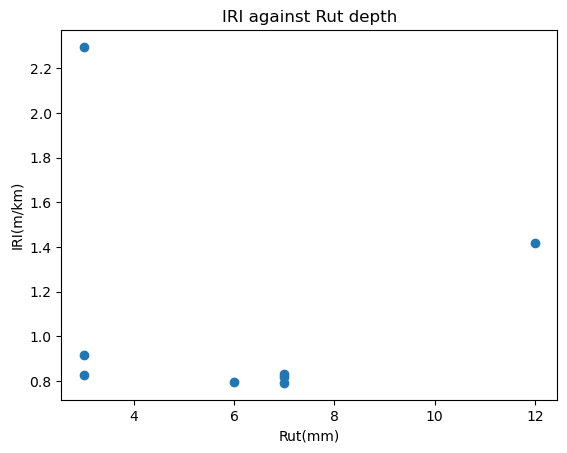

In [35]:
#Plot a scatter of IRI against Rutting
plt.scatter(data['Rut'], data['IRI'])

#Add a line of best fit
#m, b = np.polyfit(data['Rut'], data['IRI'], 1) 
#plt.plot(data['Rut'], m*data['IRI']+b, color="red")
#Set labels and title
plt.xlabel('Rut(mm)')
plt.ylabel('IRI(m/km)')
plt.title('IRI against Rut depth')
plt.show()

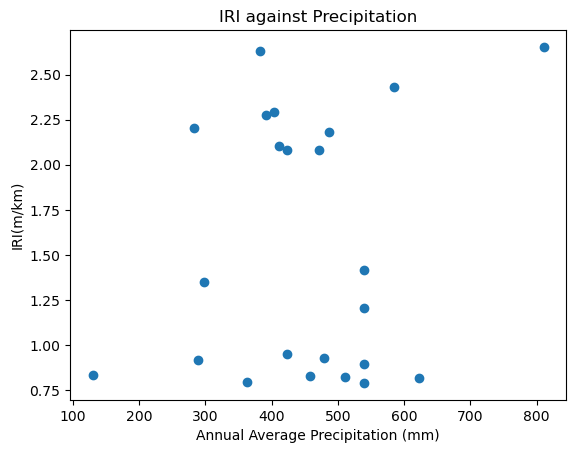

In [38]:
#Plot a scatter of IRI against Rutting
plt.scatter(data['PRP'], data['IRI'])

#Add a line of best fit
#m, b = np.polyfit(data['PRP'], data['IRI'], 1) 
#plt.plot(data['PRP'], m*data['IRI']+b, color="red")
#Set labels and title
plt.xlabel('Annual Average Precipitation (mm)')
plt.ylabel('IRI(m/km)')
plt.title('IRI against Precipitation')
plt.show()

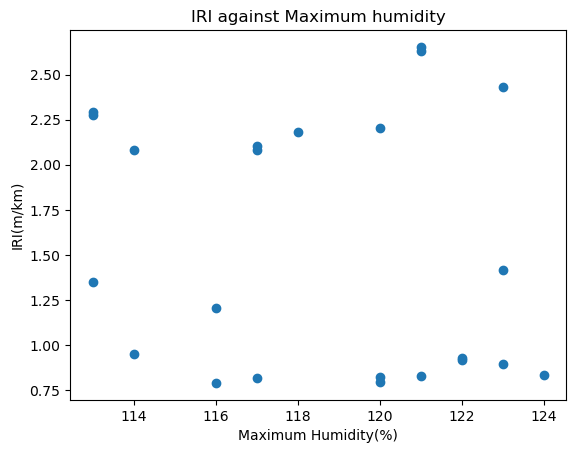

In [39]:
#Plot a scatter of IRI against Rutting
plt.scatter(data['Hum_max'], data['IRI'])

#Add a line of best fit
#m, b = np.polyfit(data['PRP'], data['IRI'], 1) 
#plt.plot(data['PRP'], m*data['IRI']+b, color="red")
#Set labels and title
plt.xlabel('Maximum Humidity(%)')
plt.ylabel('IRI(m/km)')
plt.title('IRI against Maximum humidity')
plt.show()

In [1]:
import pandas as pd
import glob

In [18]:
#Create a dataframe with particular columns
#Extract data from several excel files and input into dataframe

#Path to folder containing excel files
excel_file_path = "/Users/pamelaacheng/Library/CloudStorage/OneDrive-Nexus365/DPhil/2022/HDM4/Data/Road condition/LTTP/Complete/*.xlsx"

#Create a list to store the dataframes from each excel file
dataframes = []

#Iterate over each excel file in the directory
for file_path in glob.glob(excel_file_path):
    basic_info = pd.read_excel(file_path, sheet_name="Basic Section Overview")
    #print(basic_info.columns) #check correct column names
    Pave_Hist = pd.read_excel(file_path, sheet_name="History & Pavement Structure")
    Climate = pd.read_excel(file_path, sheet_name="Climate")
    print(Climate.columns)
    Traffic = pd.read_excel(file_path, sheet_name="Traffic")
    Distress_JPCP = pd.read_excel(file_path, sheet_name="Distress ACP & JPCP")
    Distress_CRCP = pd.read_excel(file_path, sheet_name="Distress ACP & CRCP")
    Profile = pd.read_excel(file_path, sheet_name="Profile")
    Deflection = pd.read_excel(file_path, sheet_name="Deflection")

    #Extract data from the excel files
    Road_name = str(basic_info.loc[2, "B"])
    Climate_zone = basic_info.loc[7, "A"]
    Year = Climate.iloc["Time"]

    #Create a new dataframe
    flexible = pd.DataFrame({"Road_name":[Road_name], "Climate_zone":[Climate_zone], "Year":[Year]})
    #Append dataframe to list
    dataframes.append(flexible)

#Concantecate all dataframes into a single dataframe
flexible = pd.concat(dataframes)

flexible
    

Index(['Time', 'Annual Average Precipitation (mm) ',
       'Annual Average Temperature (deg C)',
       'Annual Average Freeze Index (deg C deg days) ',
       'Annual Average Humidity            Min-Max (%)'],
      dtype='object')


TypeError: Cannot index by location index with a non-integer key

# Determine rapid decline time point 

In [ ]:
"""
Pavements ideally lose 40% of their quality in the first 75% of their lives and another 40% in the remaining 25%.
It is important to determine the point where rapid decline will be experienced.
Rapid decline is dependent upon:
1. Pavement type
2. Traffic loading
3. Pavement strength
4. Environmental factors
5. Extreme climatic conditions
"""

